In [35]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set the path to the file you'd like to load
file_path = "advertising.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ashydv/advertising-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/var/folders/jq/3spgz0t105z044g721j_zwdw0000gn/T/ipykernel_14741/11396567.py:16: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Task 1

In [36]:
# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]  # Select subsets for simple linear regression
y = df['Sales']

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 160 samples
Test set size: 40 samples


# Task 2

TV vs Sales - Intercept: 7.01, Slope: 0.06
TV vs Sales - Train MSE: 5.00
TV vs Sales - Test MSE: 6.10


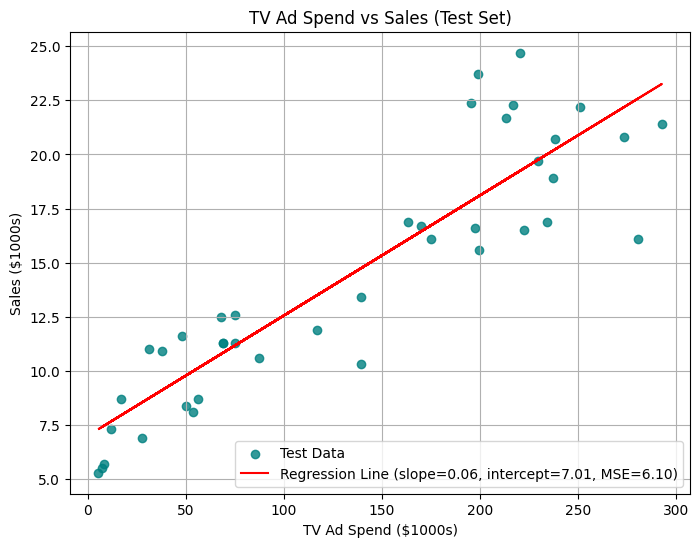

In [37]:
# Model 1: TV vs Sales
X_train_tv = X_train[['TV']]
X_test_tv = X_test[['TV']]
y_train = y_train
y_test = y_test

# Train the model
model_tv = LinearRegression()
model_tv.fit(X_train_tv, y_train)

# Predict on training and test sets
y_train_pred_tv = model_tv.predict(X_train_tv)
y_test_pred_tv = model_tv.predict(X_test_tv)

# Calculate MSE
mse_train_tv = mean_squared_error(y_train, y_train_pred_tv)
mse_test_tv = mean_squared_error(y_test, y_test_pred_tv)

print(f"TV vs Sales - Intercept: {model_tv.intercept_:.2f}, Slope: {model_tv.coef_[0]:.2f}")
print(f"TV vs Sales - Train MSE: {mse_train_tv:.2f}")
print(f"TV vs Sales - Test MSE: {mse_test_tv:.2f}")

# Visualization using test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_tv, y_test, alpha=0.8, color='teal', label='Test Data')
plt.plot(X_test_tv, y_test_pred_tv, color='red', label=f'Regression Line (slope={model_tv.coef_[0]:.2f}, intercept={model_tv.intercept_:.2f}, MSE={mse_test_tv:.2f})')
plt.title("TV Ad Spend vs Sales (Test Set)")
plt.xlabel("TV Ad Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

Radio vs Sales - Intercept: 12.59, Slope: 0.12
Radio vs Sales - Train MSE: 23.66
Radio vs Sales - Test MSE: 27.60


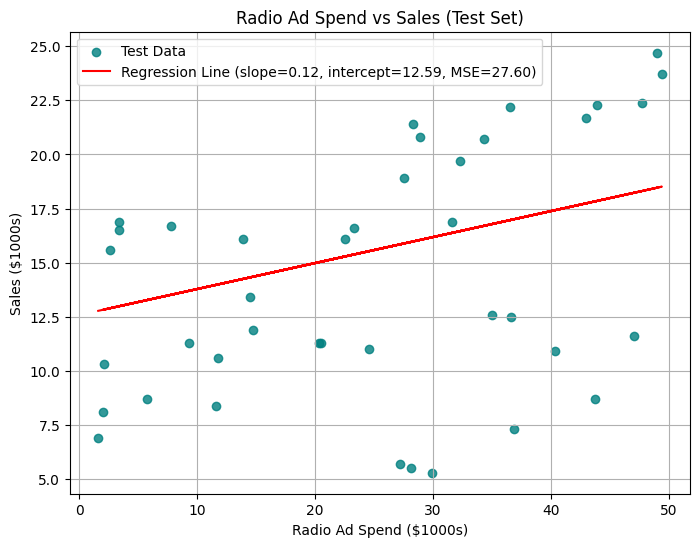

In [38]:
# Model 2: Radio vs Sales
X_train_radio = X_train[['Radio']]
X_test_radio = X_test[['Radio']]

# Train the model
model_radio = LinearRegression()
model_radio.fit(X_train_radio, y_train)

# Predict on training and test sets
y_train_pred_radio = model_radio.predict(X_train_radio)
y_test_pred_radio = model_radio.predict(X_test_radio)

# Calculate MSE
mse_train_radio = mean_squared_error(y_train, y_train_pred_radio)
mse_test_radio = mean_squared_error(y_test, y_test_pred_radio)

print(f"Radio vs Sales - Intercept: {model_radio.intercept_:.2f}, Slope: {model_radio.coef_[0]:.2f}")
print(f"Radio vs Sales - Train MSE: {mse_train_radio:.2f}")
print(f"Radio vs Sales - Test MSE: {mse_test_radio:.2f}")

# Visualization using test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_radio, y_test, alpha=0.8, color='teal', label='Test Data')
plt.plot(X_test_radio, y_test_pred_radio, color='red', label=f'Regression Line (slope={model_radio.coef_[0]:.2f}, intercept={model_radio.intercept_:.2f}, MSE={mse_test_radio:.2f})')
plt.title("Radio Ad Spend vs Sales (Test Set)")
plt.xlabel("Radio Ad Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

Newspaper vs Sales - Intercept: 14.22, Slope: 0.04
Newspaper vs Sales - Train MSE: 26.23
Newspaper vs Sales - Test MSE: 30.76


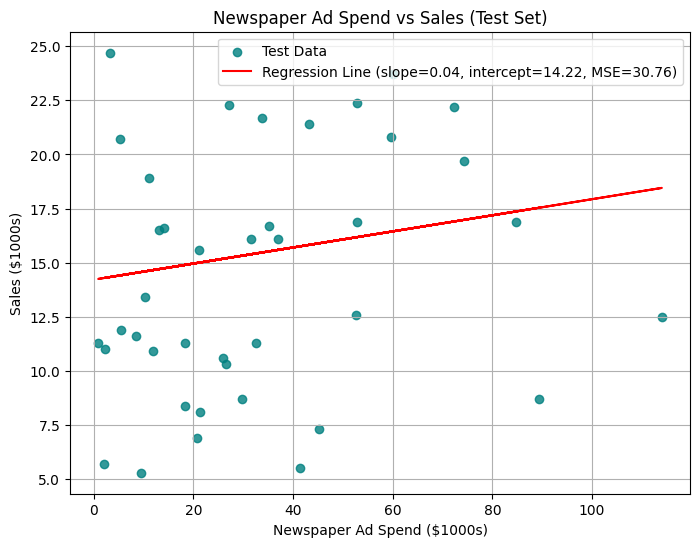

In [39]:
# Model 3: Newspaper vs Sales
X_train_newspaper = X_train[['Newspaper']]
X_test_newspaper = X_test[['Newspaper']]

# Train the model
model_newspaper = LinearRegression()
model_newspaper.fit(X_train_newspaper, y_train)

# Predict on training and test sets
y_train_pred_newspaper = model_newspaper.predict(X_train_newspaper)
y_test_pred_newspaper = model_newspaper.predict(X_test_newspaper)

# Calculate MSE
mse_train_newspaper = mean_squared_error(y_train, y_train_pred_newspaper)
mse_test_newspaper = mean_squared_error(y_test, y_test_pred_newspaper)

print(f"Newspaper vs Sales - Intercept: {model_newspaper.intercept_:.2f}, Slope: {model_newspaper.coef_[0]:.2f}")
print(f"Newspaper vs Sales - Train MSE: {mse_train_newspaper:.2f}")
print(f"Newspaper vs Sales - Test MSE: {mse_test_newspaper:.2f}")

# Visualization using test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_newspaper, y_test, alpha=0.8, color='teal', label='Test Data')
plt.plot(X_test_newspaper, y_test_pred_newspaper, color='red', label=f'Regression Line (slope={model_newspaper.coef_[0]:.2f}, intercept={model_newspaper.intercept_:.2f}, MSE={mse_test_newspaper:.2f})')
plt.title("Newspaper Ad Spend vs Sales (Test Set)")
plt.xlabel("Newspaper Ad Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

# Task 3

In [40]:
# Multiple Linear Regression: TV, Radio, Newspaper vs Sales
X_train_multi = X_train[['TV', 'Radio', 'Newspaper']]
X_test_multi = X_test[['TV', 'Radio', 'Newspaper']]

# Train the model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

# Predict on training and test sets
y_train_pred_multi = model_multi.predict(X_train_multi)
y_test_pred_multi = model_multi.predict(X_test_multi)

# Calculate MSE
mse_train_multi = mean_squared_error(y_train, y_train_pred_multi)
mse_test_multi = mean_squared_error(y_test, y_test_pred_multi)

print(f"Multiple Linear Regression - Intercept: {model_multi.intercept_:.2f}")
print(f"Multiple Linear Regression - Coefficients: TV={model_multi.coef_[0]:.2f}, Radio={model_multi.coef_[1]:.2f}, Newspaper={model_multi.coef_[2]:.2f}")
print(f"Multiple Linear Regression - Train MSE: {mse_train_multi:.2f}")
print(f"Multiple Linear Regression - Test MSE: {mse_test_multi:.2f}")

Multiple Linear Regression - Intercept: 4.71
Multiple Linear Regression - Coefficients: TV=0.05, Radio=0.10, Newspaper=0.00
Multiple Linear Regression - Train MSE: 2.68
Multiple Linear Regression - Test MSE: 2.91
